In [1]:
!pip install webdriver_manager


In [2]:
from bs4 import BeautifulSoup 
import requests 
import re 
import json 
from urllib.parse import urljoin 

def scrape_mushroom_list(url): 
data = requests.get(url).text 
soup = BeautifulSoup(data, 'html.parser') 

# Find all links to individual mushroom pages 
mushroom_links = soup.find_all('a', href=re.compile(r'/show?n=')) 
mushroom_urls = [urljoin('http://www.mushroom.world', link['href']) for link in mushroom_links] 

# Retrieve information for each mushroom
mushrooms = [scrape_mushroom(link) for link in mushroom_urls] 

return mushrooms

In [2]:
def scrape_mushroom(url): 
data = requests.get(url).text 
soup = BeautifulSoup(data, 'html.parser') 

# Extract specific information for an individual mushroom 
name_content = soup.find(class_='caption').find('b').contents 
names = re.sub('[^A-Za-z0-9( ]+', '', name_content[0])).split('(')) 
names = [n.strip() for n in names] 
name1 = names[0] 
name2 = names[1] if len(names) > 1 else '' 

labels = soup.find_all(class_='labelus') 
labels = [label.contents[0] for label in labels] 

texts = soup.find_all(class_='textus') 
texts = [text.contents[0] for text in texts] 

# Updated code to remove unwanted lines 
description = soup.find(class_='longtextus') 
if description: 
unwanted_links = description.find_all('a', href=True) 
for link in unwanted_links: 
link.extract()  # Remove unwanted links 

description = description.get_text(separator=' ', strip=True) 
else: 
description = 'Description not available' 

texts.append(description) 
assert len(labels) == len(texts) 

images = soup.find(id='mushroom-list').find_all(class_='image') 
image_urls = [urljoin('http://www.mushroom.world', image.a['href']) for image in images] 

mushroom = dict(name1=name1, name2=name2, images=image_urls, info=dict()) 

for i in range(len(labels)): 
mushroom['info'][labels[i]] = texts[i] 

return mushroom

In [3]:
if __name__ == '__main__': 
# Link to the list of all mushrooms on mushroom.world 
all_mushrooms_url = 'http://www.mushroom.world/mushrooms/namelist' 

# Retrieve information on all mushrooms 
all_mushrooms = scrape_mushroom_list(all_mushrooms_url) 

# Edibility dictionary 
edibility_dict = { 
# ... (your edibility dictionary remains unchanged)
'Agaricus arvensis': 'c', 
'Agaricus augustus': 'c', 
'Agaricus campestris': 'c', 
'Agaricus sylvicola': 'c', 
'Agrocybe pediades': 'c', 
'Agrocybe praecox': 'c', 
'Albatrellus confluens': 'p', 
'Albatrellus ovinus': 'c', 
'Aleuria aurantia': 'p', 
'Amanita battarrae': 'p',
'Amanita bisporigera': 'p',
'Amanita cokeri': 'p',
'Amanita fulva': 'p',
'Amanita jacksonii': 'p',
'Amanita muscaria': 'p',
'Amanita pantherina': 'p',
'Amanita phalloides': 'p',
'Amanita porphyria': 'p',
'Amanita regalis': 'p',
'Amanita rubescens': 'c',
'Amanita vaginata': 'p',
'Amanita virosa': 'p',
'Ampulloclitocybe clavipes': 'p',
'Armillaria mellea': 'c',
'Auriscalpium vulgare': 'p',
'Bankera fuligineoalba': 'p',
'Boletus edulis': 'c',
'Boletus pinophilus': 'c',
'Bondarzewia berkeleyi': 'p',
'Bovista nigrescens': 'p',
'Bovista plumbea': 'p',
'Calocera viscosa': 'p',
'Calocybe gambosa': 'p',
'Calocybe persicolor': 'p',
'Calvatia gigantea': 'p',
'Cantharellula umbonata': 'p',
'Cantharellus cibarius': 'c',
'Chalciporus piperatus': 'p',
'Chlorophyllum molybdites': 'p',
'Chlorophyllum rhacodes': 'p',
'Chroogomphus britannicus': 'p',
'Clathrus ruber': 'p',
'Conocybe apala': 'p',
'Coprinellus disseminatus': 'p',
'Coprinellus xanthothrix': 'p',
'Coprinopsis atramentaria': 'p',
'Coprinopsis variegata': 'p',
'Conocybe apala': 'p',
'Coprinopsis variegata': 'p',
'Coprinus comatus': 'p',
'Coprinus plicatilis': 'p',
'Cortinarius alboviolaceus': 'p',
'Cortinarius armillatus': 'p',
'Cortinarius camphoratus': 'p',
'Cortinarius caperatus': 'p',
'Cortinarius collinitus': 'p',
'Cortinarius croceus': 'p',
'Cortinarius laniger': 'p',
'Cortinarius malicorius': 'p',
'Cortinarius mucosus': 'p',
'Cortinarius orellanus': 'p',
'Cortinarius rubellus': 'p',
'Cortinarius semisanguineus': 'p',
'Cortinarius traganus': 'p',
'Cortinarius violaceus': 'p',
'Craterellus tubaeformis': 'c',
'Cystoderma amianthinum': 'p',
'Cystodermella cinnabarina': 'p',
'Entoloma sericeum': 'p',
'Entoloma vernum': 'p',
'Galerina marginata': 'p',
'Geastrum rufescens': 'p',
'Gomphidius glutinosus': 'p',
'Gymnopilus picreus': 'p',
'Gymnopus peronatus': 'p',
'Gyromitra esculenta': 'p',
'Gyromitra esculenta': 'p',
'Gyromitra infula': 'p',
'Hebeloma crustuliniforme': 'p',
'Hebeloma mesophaeum': 'p',
'Helvella elastica': 'p',
'Hericium americanum': 'p',
'Hericium cirrhatum': 'p',
'Hericium erinaceus': 'p',
'Hortiboletus rubellus': 'p',
'Hydnum repandum': 'p',
'Hydnum rufescens': 'p',
'Hygrophoropsis aurantiaca': 'p',
'Hygrophorus camarophyllus': 'p',
'Hygrophorus hypothejus': 'p',
'Hygrophorus hypothejus': 'p',
'Hygrophorus pustulatus': 'c',
'Hypholoma capnoides': 'p',
'Hypholoma fasciculare': 'p',
'Hypholoma lateritium': 'p',
'Hypholoma lateritium': 'p',
'Hypholoma marginatum': 'p',
'Imleria badia': 'p',
'Inocybe lacera': 'p',
'Kuehneromyces lignicola': 'p',
'Kuehneromyces mutabilis': 'p',
'Laccaria laccata': 'p',
'Lacrymaria lacrymabunda': 'p',
'Lactarius camphoratus': 'p',
'Lactarius deliciosus': 'c',
'Lactarius deterrimus': 'p',
'Lactarius helvus': 'p',
'Lactarius indigo': 'p',
'Lactarius lignyotus': 'p',
'Lactarius mammosus': 'p',
'Lactarius rufus': 'p',
'Lactarius tabidus': 'p',
'Lactarius torminosus': 'p',
'Lactarius trivialis': 'p',
'Lactarius turpis': 'p',
'Lactarius volemus': 'p',
'Lactifluus piperatus': 'p',
'Laetiporus sulphureus': 'p',
'Leccinum aurantiacum': 'p',
'Leccinum scabrum': 'p',
'Leccinum versipelle': 'p',
'Lepiota clypeolaria': 'p',
'Leucocoprinus birnbaumii': 'p',
'Leucocybe connata': 'p',
'Lycoperdon excipuliforme': 'p',
'Lycoperdon nigrescens': 'p',
'Lycoperdon perlatum': 'p',
'Lycoperdon pratense': 'p',
'Lycoperdon pyriforme': 'p',
'Macrolepiota procera': 'p',
'Marasmiellus perforans': 'p',
'Marasmius oreades': 'p',
'Melanoleuca cognata': 'p',
'Morchella elata': 'p',
'Morchella esculenta': 'p',
'Mycena epipterygia': 'p',
'Mycena galericulata': 'p',
'Mycena laevigata': 'p',
'Mycena pura': 'p',
'Omphalotus illudens': 'p',
'Omphalotus olearius': 'p',
'Otidea onotica': 'p',
'Panaeolus foenisecii': 'p',
'Paxillus involutus': 'p',
'Peziza badia': 'p',
'Phallus impudicus': 'p',
'Phallus rubicundus': 'p',
'Pholiota alnicola': 'p',
'Pholiota aurivella': 'p',
'Pholiota limonella': 'p',
'Pholiota squarrosa': 'p',
'Pleurotus citrinopileatus': 'p',
'Pleurotus ostreatus': 'c',
'Pleurotus pulmonarius': 'c',
'Polyporus ciliatus': 'p',
'Polyporus squamosus': 'p',
'Psathyrella candolleana': 'c',
'Psathyrella microrrhiza': 'p',
'Psathyrella sp.': 'p',
'Psilocybe semilanceata': 'p',
'Rickenella swartzii': 'c',
'Rubroboletus satanas': 'p',
'Russula acrifolia': 'p', 
'Russula adusta': 'p', 
'Russula aeruginea': 'p',
'Russula claroflava': 'p',
'Russula paludosa': 'c',
'Russula velenovskyi': 'p',
'Russula vesca': 'c',
'Russula vinosa': 'c',
'Russula xerampelina': 'c',
'Sarcodon squamosus': 'p',
'Strobilomyces strobilaceus': 'p',
'Strobilurus esculentus': 'c',
'Strobilurus stephanocystis': 'p',
'Stropharia hornemannii': 'p',
'Suillus americanus': 'c', 
'Suillus bovinus': 'c', 
'Suillus grevillei': 'p', 
'Suillus luteus': 'c', 
'Suillus variegatus': 'p', 
'Tapinella atrotomentosa': 'c', 
'Tapinella panuoides': 'p', 
'Tricholoma aestuans': 'p', 
'Tricholoma equestre': 'c', 
'Tricholoma focale': 'p', 
'Tricholoma saponaceum': 'p', 
'Tricholoma sejunctum': 'p', 
'Tricholoma stiparophyllum': 'p', 
'Tricholomopsis decora': 'p', 
'Tricholomopsis rutilans': 'p', 
'Turbinellus floccosus': 'p', 
'Tylopilus felleus': 'p', 
'Xerocomellus chrysenteron': 'c', 
'Xerocomus subtomentosus': 'c', 
'Xeromphalina campanella': 'p', 
'Tricholomopsis decora': 'p', 
'Clitocybe gibba': 'c', 
'Clitocybe nuda': 'c', 
'Clitopilus prunulus': 'c', 
'Collybia dryophila': 'c', 
'Coltricia perennis': 'p', 
'Conocybe apalas': 'p', 
'Marasmius rotula': 'p', 
'Tricholomataceae': 'c', 
'Ramaria lutea': 'p', 
'Rhizina undulata': 'p', 
'Russula decolorans': 'c', 
'Russula emetica': 'p', 
'Russula mustelina': 'c', 
'Clitocybe nebularis': 'p', 
}

# Add edibility to final output 
for mushroom in all_mushrooms: 
name = mushroom['name1'] 
if name in edibility_dict: 
mushroom['comestibility'] = edibility_dict[name] 
else: 
mushroom['comestibility'] = 'Information not available' 
# Delete edibility information from web page 
if 'Edibility' in mushroom['info']: 
del mushroom['info']['Edibility'] 

# Display information (or save to file, etc.) 
print(json.dumps(all_mushrooms, indent=2))

In [4]:
!pip install Pillow

This code reads a JSON file containing mushroom data into a pandas DataFrame, processes the DataFrame by exploding the 'images' column, dropping the 'info' column, and then mapping the 'comestibility' values to numeric values (1 for 'c' and 0 for 'p'). It further cleans the DataFrame by dropping rows with missing values and resetting the index, ultimately converting the 'comestibility' column to integer type. The resulting DataFrame is displayed.

In [5]:
import pandas as pd 

file_path = 'champiURL.json' 
df = pd.read_json(file_path) 
df = df.explode('images', ignore_index = True) 
df = df.drop(columns=['info']) 

mapping = { 
    'c' : 1, 
    'p' : 0 
} 

df['comestibility'] = df['comestibility'].map(mapping) 
df = df.dropna().reset_index() 
df['comestibility'] = df['comestibility'].astype(int) 
df 


This script utilizes the Python Imaging Library (PIL) to download images from URLs stored in a DataFrame. It first checks if the 'images' directory exists and creates it if not. Then, for each row in the DataFrame, it makes a GET request to the image URL, retrieves the image data, resizes it to 96x96 pixels, and saves it as a PNG file in the 'images' directory. The script also includes error handling to print messages in case of unsuccessful requests and displays progress messages for every 50 images processed.

In [6]:
from PIL import Image 
from io import BytesIO 
import numpy as np 
import requests 
import os 

if not os.path.exists('images'): 
# Create the directory if it doesn't exist 
os.makedirs('images') 

for i in range(len(df)): 
# Make a GET request to the URL 
url = df['images'][i] 
response = requests.get(url) 
response.raise_for_status()  # Check if the request was successful 

if response.status_code == 200: 
# Convert the image to base64 
image = Image.open(BytesIO(response.content)) 
image = image.resize((96, 96)) 
image.save(f'images/{i+1}.png') 
else: 
# If the request was not successful, print an error message 
print(f'Error: Unable to fetch image from {url}. Status code: {response.status_code}') 

if i%50 == 0: 
print(f'Image {i}/{len(df)}')

Image 0/1027 
Image 50/1027 
Image 100/1027 
Image 150/1027 
Image 200/1027 
Image 250/1027 
Image 300/1027 
Image 350/1027 
Image 400/1027 
Image 450/1027 
Image 500/1027 
Image 550/1027 
Image 600/1027 
Image 650/1027 
Image 700/1027 
Image 750/1027 
Image 800/1027 
Image 850/1027 
Image 900/1027 
Image 950/1027 
Image 1000/1027

This script initializes an empty list to store images and then loops through the rows of the DataFrame 'df'. For each row, it reads the corresponding image from the 'images' folder, converts it to a NumPy array, resizes it to the specified dimensions (96x96 pixels), and appends the array to the list. Finally, the list of image arrays is converted into a NumPy array, and the shape of the resulting array is printed. This script essentially reads and processes images from the 'images' folder, preparing them for further analysis.

In [7]:
img_size = 96 
# Initialize an empty list to store images 
images_list = [] 

# Loop through the rows of the DataFrame 'df' 
for i in range(len(df)): 
# Read each image from the 'images' folder and convert it to a NumPy array 
images_list.append(np.array(Image.open(f'images/{i+1}.png').resize((img_size, img_size)))) 

# Convert the list of image arrays to a NumPy array 
images_list = np.array(images_list) 

# Print the shape of the resulting NumPy array 
print(images_list.shape)

(1027, 96, 96, 3)

This script imports necessary libraries from TensorFlow and other packages, defines a function named let_me_see for visualizing training and validation history using matplotlib, and checks if the script is executed as the main module to create a 'models' folder for saving trained models if it doesn't exist. The main purpose of the script seems to be setting up the environment for building and training neural network models using TensorFlow for a classification task. The let_me_see function is designed to visualize the training and validation accuracy as well as the loss over epochs.

In [8]:
# Importing necessary libraries from TensorFlow and other packages 
from tensorflow import keras 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D 
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt 
import numpy as np 
import os 

# Function to visualize training and validation history 
def let_me_see(history): 
# Create a figure with two subplots for accuracy and loss 
plt.figure(figsize=(8, 4)) 
plt.subplot(1, 2, 1) 

# Plot training and validation accuracy 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 

plt.subplot(1, 2, 2) 

# Plot training and validation loss 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

# Adjust layout for better visualization 
plt.tight_layout() 
plt.show() 

# Check if the script is executed as the main module 
if __name__ == '__main__': 
# Create a folder named 'models' to save trained models if it doesn't exist 
os.makedirs('models', exist_ok=True)

In this block, if the script is executed as the main module, it loads the Mushroom dataset (images_list and comestibility labels) and performs data preparation steps. It normalizes the input data by dividing it by 255.0, shuffles the dataset using the shuffle function from scikit-learn, and comments about the expected shapes of X (input images) and y (labels) after these transformations. The labels are not one-hot encoded in this version of the script, and the shape of y is mentioned as (1027, 2).

In [9]:
if __name__ == '__main__': 
# Load the MNIST dataset and split it into training and testing sets 
X, y = images_list, np.array(df['comestibility']) 

# Perform data normalization 
X = X / 255.0 

# Convert the labels to one-hot encoded vectors 
 #y = keras.utils.to_categorical(y) 
X, y = shuffle(X, y) 

# X: (N, h, w, c) = (1027, 64, 64, 3) 
# y: (N, 2) = (1027, 2)

In this section, the script includes a conditional check to determine if it is the main module. If true, it proceeds to define two lists, one containing human-readable class names ('Toxic', 'Comestible'), and the other containing corresponding integer labels (1, 0). These lists are likely used for classification tasks, providing a mapping between class names and their numerical representations.

In [10]:
# Check if the script is executed as the main module 
if __name__ == '__main__': 
# Define classes for classification 
classes = ['Toxic', 'Comestible'] 
classes_int = [1, 0]

In [11]:
print(y.shape)

(1027,)

In this block, if the script is executed as the main module, it visualizes a set of images from the training data (X) along with their corresponding class labels (y). The script creates a 5x5 grid of subplots, displaying images with their associated class names. The images are plotted using matplotlib, and the class names are included as titles for each subplot.

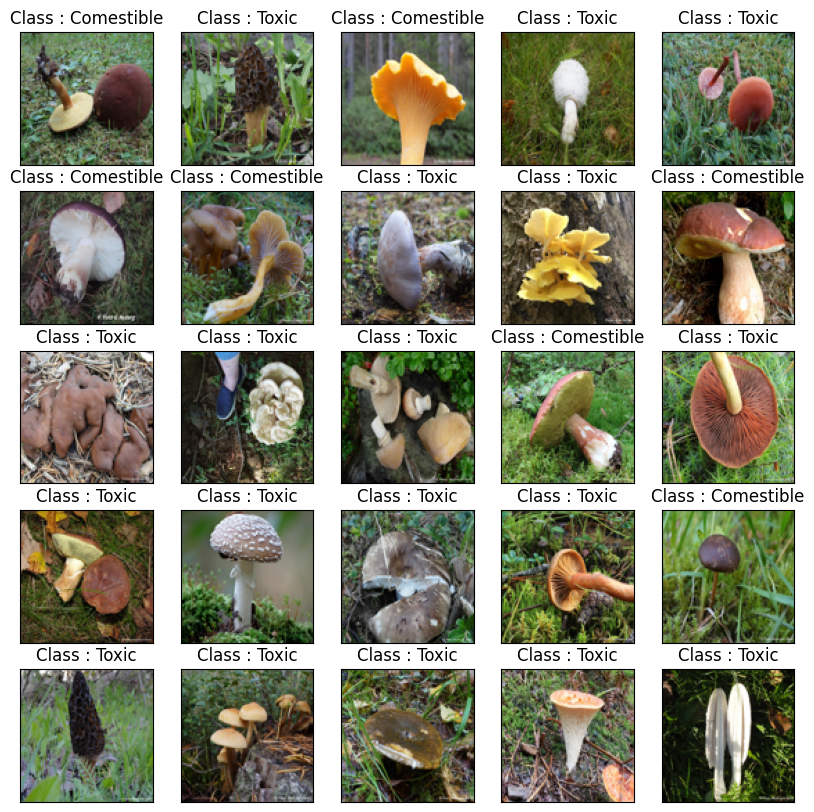

In [12]:
if __name__ == '__main__': 
# visualize the picture in x_train 
plt.figure(figsize=(10, 10)) 
for i in range(25): 
plt.subplot(5, 5, i+1) 
plt.imshow(X[i]) 
plt.xticks([]) 
plt.yticks([]) 
plt.title(f'Class : {classes[y[i]]}')

This code block sets up a data augmentation pipeline using TensorFlow and Keras, applying horizontal flipping, rotation, and zoom to enhance the diversity of the training data.

In [13]:
data_augmentation = keras.Sequential( 
[ 
RandomFlip('horizontal',input_shape=(img_size, img_size, 3)), 
RandomRotation(0.3), 
RandomZoom(0.3), 
] 
)

This function defines a convolutional neural network (CNN) model for image classification. The model includes data augmentation, a convolutional layer with max-pooling and dropout, a flattening layer, a dense layer with ReLU activation and dropout, and a final dense layer with sigmoid activation for binary classification. The function takes the input image shape as a parameter and returns the constructed model.

In [14]:
def myModel(img_shape): 
# Create a sequential model 
model = Sequential() 

model.add(data_augmentation) 

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3))) 
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2)) 

model.add(Flatten()) 
model.add(Dense((64), activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid')) 

return model

In this section, if the script is run as the main module, a convolutional neural network (CNN) model is created, compiled with Adam optimizer and binary crossentropy loss, and then trained on the provided data for 5 epochs. The training history is stored in the 'history' variable.

In [15]:
if __name__ == '__main__': 
# Create the model 
model = myModel(img_shape=(img_size, img_size, 3)) 

# Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Train the model 
history = model.fit(X, y, epochs=5, batch_size=128, validation_split=0.2) #80% accurary for the classification = good

Epoch 1/5 
7/7 [==============================] - 33s 4s/step - loss: 2.2360 - accuracy: 0.6833 - val_loss: 0.7205 - val_accuracy: 0.2233 
Epoch 2/5 
7/7 [==============================] - 15s 2s/step - loss: 0.6394 - accuracy: 0.6188 - val_loss: 0.5619 - val_accuracy: 0.7767 
Epoch 3/5 
7/7 [==============================] - 14s 2s/step - loss: 0.5523 - accuracy: 0.8015 - val_loss: 0.5458 - val_accuracy: 0.7767 
Epoch 4/5 
7/7 [==============================] - 14s 2s/step - loss: 0.5321 - accuracy: 0.8063 - val_loss: 0.5507 - val_accuracy: 0.7767 
Epoch 5/5 
7/7 [==============================] - 15s 2s/step - loss: 0.5370 - accuracy: 0.8063 - val_loss: 0.5458 - val_accuracy: 0.7767

Here we can use this code to see what the model looks like post training.

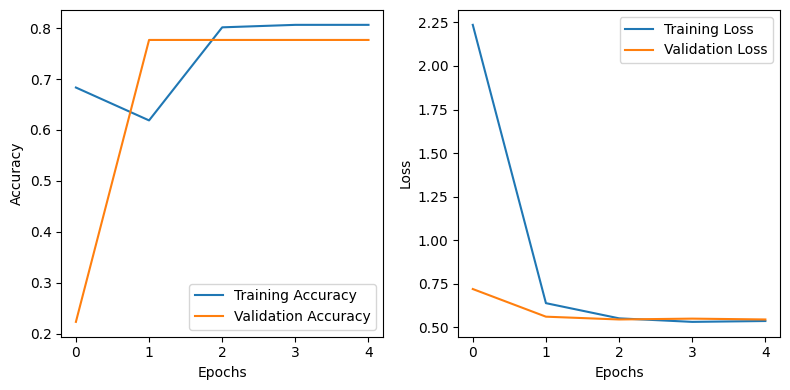

In [16]:
if __name__ == '__main__': 
let_me_see(history)

This permits us to see the model prediction of each image of our dataset

In [17]:
print(model.predict(X))

33/33 [==============================] - 4s 111ms/step 
[[0.21328056] 
[0.22208573] 
[0.19793364] 
... 
[0.21520185] 
[0.15646641] 
[0.19575879]]

This is the final product of our project : The prediction of any image.

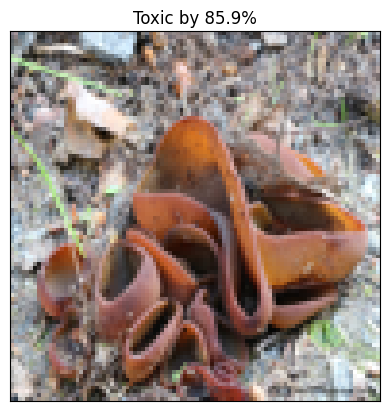

In [18]:
def predict_mushroom(img): 
img = img.convert('RGB') 
img_array = np.array(img) / 255.0 
img_array = np.expand_dims(img_array, 0) 
predict = model.predict(img_array) 
plt.imshow(img) 
plt.xticks([]) 
plt.yticks([]) 
plt.title(classes[predict.argmax()] + ' by ' + str(round((classes_int[round(predict[0][0])] - predict[0][0])*100, 1)) + '%') 
plt.show() 

img = Image.open(f'images/754.png').resize((img_size, img_size)) 
predict_mushroom(img)